In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Conduct a thresholding with a threshold=200

## (1) read image

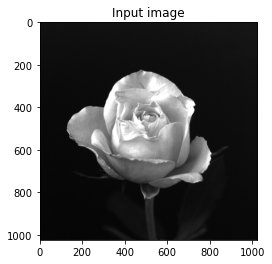

In [2]:
img = Image.open('Rose-BMP.bmp').convert('L')
bw_img = np.array(img)

plt.title('Input image')
plt.imshow(bw_img, cmap='gray')
plt.show()

## (2) thresholded binary image

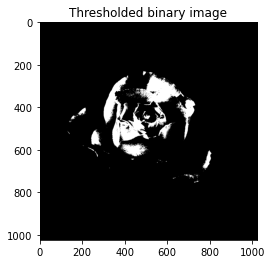

In [3]:
bin_img = bw_img.copy()

threshold = 200
bin_img[bin_img<threshold] = 0
bin_img[bin_img>=threshold] = 1

plt.title('Thresholded binary image')
plt.imshow(bin_img, cmap='gray')
plt.show()

# 2. Delete all the regions which are less than 10,000

In [4]:
connectivity_4 = np.array([[0,1,0],
                           [1,0,0],
                           [0,0,0]])

connectivity_8 = np.array([[1,1,1],
                           [1,0,0],
                           [0,0,0]])

In [5]:
def find_labels(labels, r, c, neighbors):
    
    tmp_labels = labels[r-1:r+2, c-1:c+2]*neighbors
    
    return np.sort(tmp_labels[np.nonzero(tmp_labels)])
    
def connected_component_labeling(bin_img, connectivity=connectivity_8):
    
    equivalent = []
    labels = np.zeros_like(bin_img, dtype='int64')
    next_label = 1
    
    # 1st pass
    for r, row in enumerate(bin_img):
        for c, pixel in enumerate(row):
            
            if pixel!=0:
                neighbors = bin_img[r-1:r+2, c-1:c+2]*connectivity
                num_neighbors = np.count_nonzero(neighbors)
                
                if num_neighbors==0:
                    labels[r,c] = next_label
                    equivalent.append([next_label,next_label])
                    next_label += 1
                else:
                    L = find_labels(labels, r, c, neighbors)
                    labels[r,c] = np.min(L)
                    
                    uni_L = np.unique(L)
                    if len(uni_L)>1:
                        for i, e in enumerate(equivalent):
                            if uni_L[0] in e:
                                equivalent[i].extend(uni_L[1:])
                                equivalent[i] = list(sorted(set(equivalent[i])))                       
    # 2nd pass
    for e in equivalent:
        for f in reversed(e):
            labels[labels==f] = e[0]
        
    return labels

def threshold_labels(labels, threshold=10000):
            
    unique_elements, counts_elements = np.unique(labels, return_counts=True)        
    thr_elements = unique_elements[counts_elements>threshold]
    
    thr_labels = np.zeros_like(labels)
    
    cnt = 0
    for e in thr_elements:
        if e != 0:
            cnt += 1
            thr_labels[labels==e] = cnt
            
    return thr_labels

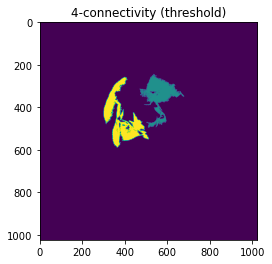

In [6]:
labels_4 = connected_component_labeling(bin_img, connectivity_4)
thr_labels_4 = threshold_labels(labels_4)

plt.title('4-connectivity (threshold)')
plt.imshow(thr_labels_4)
plt.show()

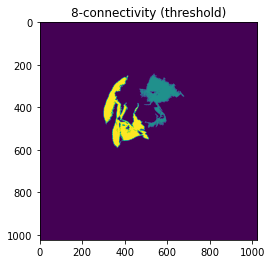

In [7]:
labels_8 = connected_component_labeling(bin_img, connectivity_8)
thr_labels_8 = threshold_labels(labels_8)

plt.title('8-connectivity (threshold)')
plt.imshow(thr_labels_8)
plt.show()

# 3. Count the number of remaining regions

In [8]:
_, counts_elements_4 = np.unique(thr_labels_4, return_counts=True)

print('4-connectivity')
for l, c in enumerate(counts_elements_4):
    print('label :', l)
    print('number of pixel :', c)

4-connectivity
label : 0
number of pixel : 1010003
label : 1
number of pixel : 16724
label : 2
number of pixel : 21849


In [9]:
_, counts_elements_8 = np.unique(thr_labels_8, return_counts=True)
    
print('8-connectivity')
for l, c in enumerate(counts_elements_8):
    print('label :', l)
    print('number of pixel :', c)

8-connectivity
label : 0
number of pixel : 1008875
label : 1
number of pixel : 17103
label : 2
number of pixel : 22598
